In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


training = pd.read_csv('../data/matches_test.csv')[:56000]
validation = pd.read_csv('../data/matches_test.csv')[56000:]

In [41]:
def remove_columns(dataframe):
    labels = dataframe.pop('p1_win')
    dataframe.pop('match_hash')
    dataframe.pop('tourney_name')
    dataframe.pop('tourney_date')
    dataframe.pop('p1_name')
    dataframe.pop('p2_name')

    return labels

In [42]:
training_labels = remove_columns(training)
validation_labels = remove_columns(validation)

In [43]:
# model = RandomForestClassifier(n_estimators=10)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# # define search space
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# space = dict()
# # space['n_estimators'] = [int(x) for x in np.linspace(start = 10, stop = 20, num = 10)]
# space['max_features'] = ['auto', 'sqrt']
# space['max_depth'] = max_depth
# space['min_samples_split'] = [2, 5, 10]
# space['bootstrap'] = [True, False]
# # define search 
# search = RandomizedSearchCV(model, space, n_iter=2, scoring='neg_log_loss', cv=cv, random_state=1)
# # execute search
# result = search.fit(training, training_labels)
# # summarize result
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)



model = RandomForestClassifier(n_estimators = 10, random_state = 42, min_samples_leaf = 45, criterion = 'log_loss')
model.fit(training, training_labels)

RandomForestClassifier(criterion='log_loss', min_samples_leaf=45,
                       n_estimators=10, random_state=42)

In [44]:
# 10-Fold Cross validation
# print(np.mean(cross_val_score(model, training, training_labels, cv=10)))

from sklearn.metrics import log_loss

print('accuracy', model.score(validation, validation_labels))
print(model.score(training, training_labels))
print('log loss', log_loss(validation_labels, model.predict_proba(validation)))

accuracy 0.7186990810141433
0.7416785714285714
log loss 0.5595858266053313


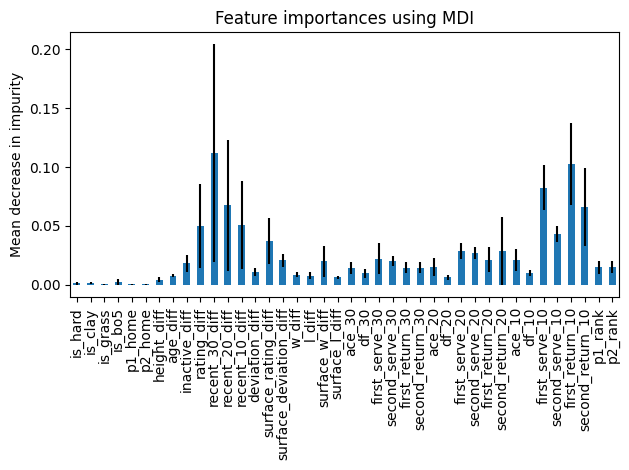

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = training.keys()
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

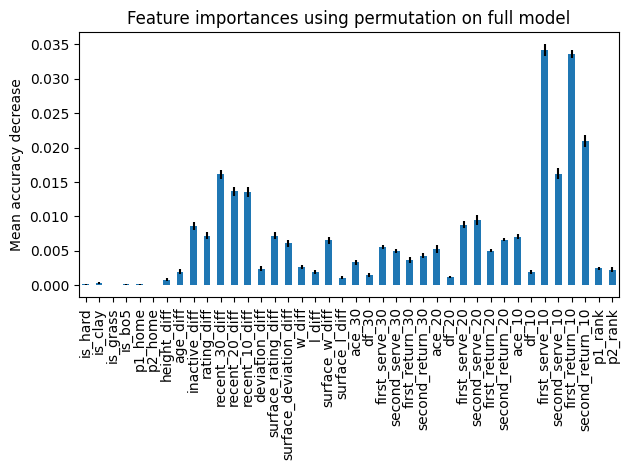

In [46]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model, training, training_labels, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()